In [1]:
import torch

In [6]:
x = torch.randn(100, 1) # 100개의 랜덤 숫자중 1차원으로 만들어라
x = x*10
x.size()

torch.Size([100, 1])

In [8]:
y = x + torch.randn(100, 1)
y.size()

torch.Size([100, 1])

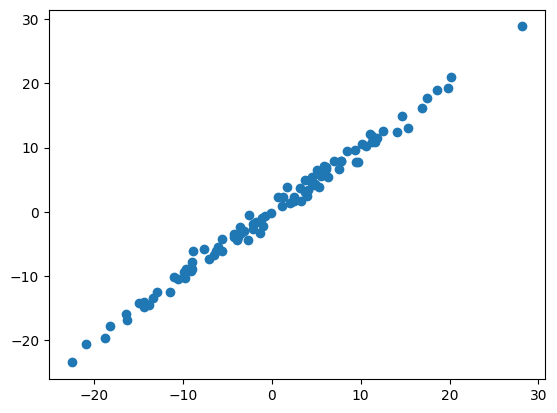

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

## torch 모델 생성 방법

In [12]:
import torch.nn as nn
# nn안에 신경망 모델이 다 들어있다.

## 선형 회귀 모델
class LRModel(nn.Module):
    def __init__(self):
        super(LRModel,self).__init__()
        self.layer = nn.Linear(1,1)
        # linear는 첫번째 인자값이 input, 두번째는 output
        
    # 실제 데이터는 여기 forward로 들어온다.
    def forward(self, x):
        # x값을 input으로 집어넣는다는 뜻
        x = self.layer(x)
        return x

model = LRModel()    
model

LRModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
w,b = model.parameters()
print(w)
print(b)

Parameter containing:
tensor([[-0.5327]], requires_grad=True)
Parameter containing:
tensor([0.8952], requires_grad=True)


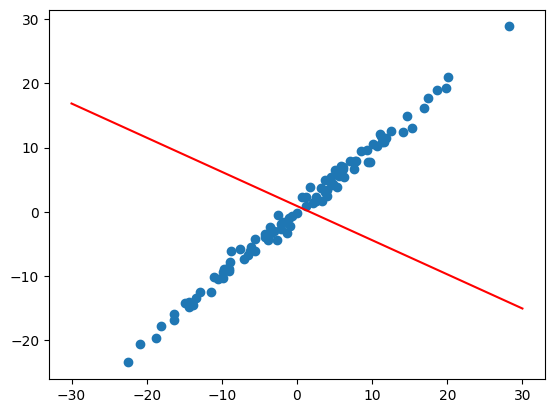

In [18]:
import numpy as np

# item을 써야지만 tensor안의 값을 가져올 수 있다.
w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1, y1, color = 'red')
plt.show()

## 학습 시키기
- 학습시킬때 필요한 것들
    - 손실함수, 최적화 함수(optimizer): 돌때마다 zero로 초기화시켜줘야한다, metrics, epochs, learning rate

In [21]:
import torch.optim as optim

# mse 손실함수
criterion = nn.MSELoss() 
# lr은 learning rate, 
optimizer = optim.SGD(model.parameters(),lr = 0.001)
epochs = 20

cri_list = []

for epoch in range(epochs):
    optimizer.zero_grad()
    
    pred = model(x)
    loss = criterion(pred, y)
    # (예측, 실제정답값)
    cri_list.append(loss.item())
    loss.backward()
    print(f'{epoch+1} loss:{loss.item()}')
    optimizer.step()
    

1 loss:234.86402893066406
2 loss:150.22369384765625
3 loss:96.29876708984375
4 loss:61.94243621826172
5 loss:40.053138732910156
6 loss:26.106515884399414
7 loss:17.220121383666992
8 loss:11.557574272155762
9 loss:7.948929309844971
10 loss:5.648813247680664
11 loss:4.182356834411621
12 loss:3.2470264434814453
13 loss:2.650076389312744
14 loss:2.268709659576416
15 loss:2.0246951580047607
16 loss:1.868190884590149
17 loss:1.7674429416656494
18 loss:1.7022205591201782
19 loss:1.6596368551254272
20 loss:1.6314783096313477


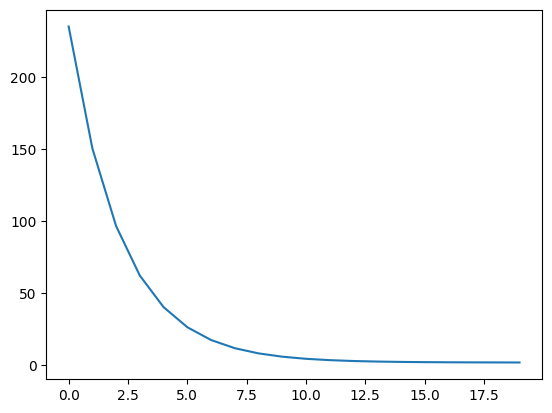

In [22]:
plt.plot(range(epochs), cri_list)
plt.show()

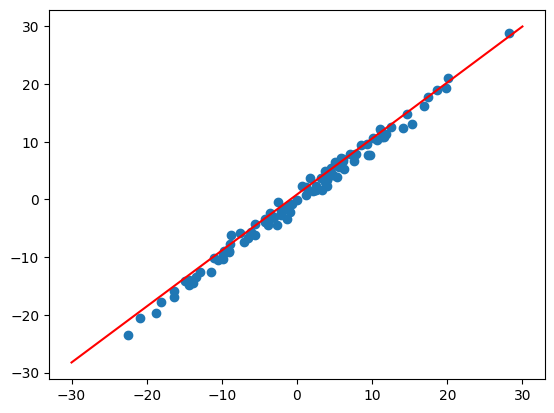

In [23]:
w,b = model.parameters()

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1, y1, color = 'red')
plt.show()

# 보스턴 집값 예측 선형회귀 실습 

In [27]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name = 'boston')

dataset.keys()

C:\Users\user\miniconda3\envs\meta\lib\site-packages\sklearn\datasets\_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
import pandas as pd

df = pd.DataFrame(dataset['data'])
df.columns = dataset['feature_names']
df['target'] = dataset['target']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  target   506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [40]:
df['CHAS'] = df['CHAS'].astype('float')
df['RAD'] = df['RAD'].astype('float')

### 모델 생성

In [41]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [42]:
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

model

Sequential(
  (0): Linear(in_features=13, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

### data split

In [43]:
X_train = df.iloc[:,:13].values
X_train.shape

(506, 13)

In [44]:
y_train = df.iloc[:,-1].values
y_train.shape

(506,)

In [45]:
# 배치 단위로 학습 시키기 위해
batch_size = 100
optim = Adam(model.parameters(), lr = 0.001)
epochs = 200

for epoch in range(epochs):
    for temp in range(len(X_train) // batch_size):
        # start값, end값
        s = temp*batch_size
        e = s + batch_size
        
        x = torch.FloatTensor(X_train[s:e])
        y = torch.FloatTensor(y_train[s:e])
        
        optim.zero_grad()
        pred = model(x)
        loss = nn.MSELoss()(pred, y)
        loss.backward()
        optim.step()
        
    # 배치 단위 만큼 끊어서    
    if epoch % 10 == 0:
        print(f'{epoch+1} loss:{loss.item()}')

C:\Users\user\miniconda3\envs\meta\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1 loss:1921.52734375
11 loss:36.47346115112305
21 loss:43.04537582397461
31 loss:41.70188522338867
41 loss:40.99571228027344
51 loss:40.49683380126953
61 loss:40.11989212036133
71 loss:39.78436279296875
81 loss:39.39020538330078
91 loss:39.081886291503906
101 loss:38.8338623046875
111 loss:38.60295867919922
121 loss:38.4485969543457
131 loss:38.26888656616211
141 loss:38.10127639770508
151 loss:37.94545364379883
161 loss:37.82118225097656
171 loss:37.70372009277344
181 loss:37.5991325378418
191 loss:37.53581619262695


## 확인

In [46]:
# 첫번째 집값 데이터 
pred = model(torch.FloatTensor(X_train[0, :13]))
pred

tensor([25.7310], grad_fn=<AddBackward0>)

In [47]:
y_train[0]

24.0

## 모델 저장

In [48]:
# 가중치 bias 확인
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2620, -0.2773,  0.0239,  ...,  0.2487, -0.1587, -0.1812],
                      [ 0.0236,  0.1594, -0.2379,  ..., -0.2432, -0.0141,  0.2042],
                      [-0.0289, -0.0388, -0.2695,  ...,  0.2468, -0.0146,  0.0040],
                      ...,
                      [ 0.0479,  0.1842,  0.1428,  ...,  0.1627, -0.1587,  0.1341],
                      [ 0.0476, -0.2604,  0.0671,  ...,  0.1330, -0.2532,  0.0091],
                      [-0.0997, -0.0614, -0.0449,  ...,  0.0965, -0.2617, -0.1294]])),
             ('0.bias',
              tensor([-0.2392, -0.1880,  0.2744,  0.0336,  0.0315,  0.2446, -0.0402,  0.0328,
                       0.0369,  0.2193, -0.2100, -0.1088,  0.2071, -0.2634, -0.1209, -0.0564,
                      -0.0225, -0.2522, -0.3268,  0.1162,  0.1847, -0.2127,  0.2595, -0.0539,
                      -0.1579, -0.0703,  0.0100, -0.1826,  0.0890,  0.0781,  0.1271, -0.0034,
                       0.3025, -0.2646, 

In [49]:
# 모델 저장
torch.save(model.state_dict(), 'model.pth')

In [50]:
# 모델 로드
model_new = model()
model_new.load_state_dict(torch.load('model.pth'))

TypeError: forward() missing 1 required positional argument: 'input'